# **주택가격 회귀 분석**

In [ ]:
import warnings

warnings.filterwarnings(action='ignore') 

### **1. 데이터 수집**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

### **2. 데이터 준비 및 탐색**

In [ ]:
print(boston.DESCR)

In [41]:
colab_path='/content/drive/'
file_path = colab_path+'MyDrive/python_code/dataset/boston_data.csv'

In [42]:
boston_df = pd.read_csv(file_path)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* CRIM: 지역별 범죄 발생률
* zn: 25,000평방 피트를 초과하는 거주 지역 비율
* INDUS: 비상업 지역의 넓이 비율
* CHAS: 찰스강의 더비변수(1은 강의 경계, O은 경계 아님)
* NOX: 일산화질소 농도
* AGE: 1940년 이전에 건축된 주택 비율
* DIS: 5개 주요 고용센터까지 가중 거리
* RAD: 고속도로 접근 용이
* TAX: 10,000달러당 재산세 비율
* PTRATIO: 지역의 교수와 학생수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위계층비율
* PRICE(MEDV): 본인 소유 주택 가격의 중앙값

In [43]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (404, 14)


In [44]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [45]:
boston_df.isna().sum() #결측치 확인

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### **3. 분석 모델 구축**

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**1) X, Y 분할하기**

In [48]:
Y = boston_df['medv']
X = boston_df.drop(['medv'], axis=1, inplace=False)

**2) 훈련용 데이터와 평가용 데이터 분할하기**

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

**3) 선형회귀분석 : 모델 생성**

In [50]:
lr = LinearRegression()


**4) 선형회귀분석: 모델 훈련**

In [51]:
lr.fit(X_train, Y_train)

LinearRegression()

**5) 평가 데이터에 대한 예측 수행: 결과 예측 Y_predict**

In [52]:
Y_predict = lr.predict(X_test)

In [53]:
Y_predict

array([31.38870867, 23.73135233, 17.45981116, 19.10144257, 28.7648725 ,
       27.32400474, 20.83875608, 17.45725512, 22.94172874, 30.7439803 ,
       16.82431456, 16.59244287, 35.40153738, 29.94813264, 18.8072143 ,
       14.88166183, 21.81358482, 16.76880546, 16.23750782, 26.34413275,
        9.71679317, 21.45484262, 25.87308276, 15.2431944 , 19.63486059,
       28.51346366, 24.33833208, 21.97197355, 22.15525031, 24.79959189,
       22.62474106, 23.9204766 , 28.45318814,  9.69603873, 19.33181565,
       18.52100183, 21.83872719, 17.3588097 , 11.21440392, 23.7090248 ,
       19.10494262, 20.92206536, 17.58212495, 26.18302448, 34.290466  ,
       15.33530052, 21.48473612, 13.98586768, 22.0874818 , 31.24691408,
        8.71678292,  8.74814276, 18.70453779, 34.12818197, 28.66539467,
       17.86386068, 13.58292241, 24.75255757, 34.86410958, 13.83550256,
       19.73026482, 19.43194519, 30.43399262, 15.70059561, 15.44312099,
       17.18034757, 24.41872269,  5.01417144, 22.68301829, 24.98

### **4. 결과 분석**

In [54]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 16.164, RMSE : 4.020
R^2(Variance score) : 0.746


In [55]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  31.38166425328258
회귀 계수 값:  [ -0.1   0.    0.    2.2 -17.    4.4  -0.   -1.3   0.2  -0.   -0.9   0.
  -0.5]


In [57]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

rm          4.38
chas        2.24
rad         0.22
zn          0.04
indus       0.02
black       0.01
age        -0.00
tax        -0.01
crim       -0.11
lstat      -0.49
ptratio    -0.94
dis        -1.33
nox       -16.98
dtype: float64

### **5. 회귀 분석 결과의 선형 회귀 그래프 시각화**

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

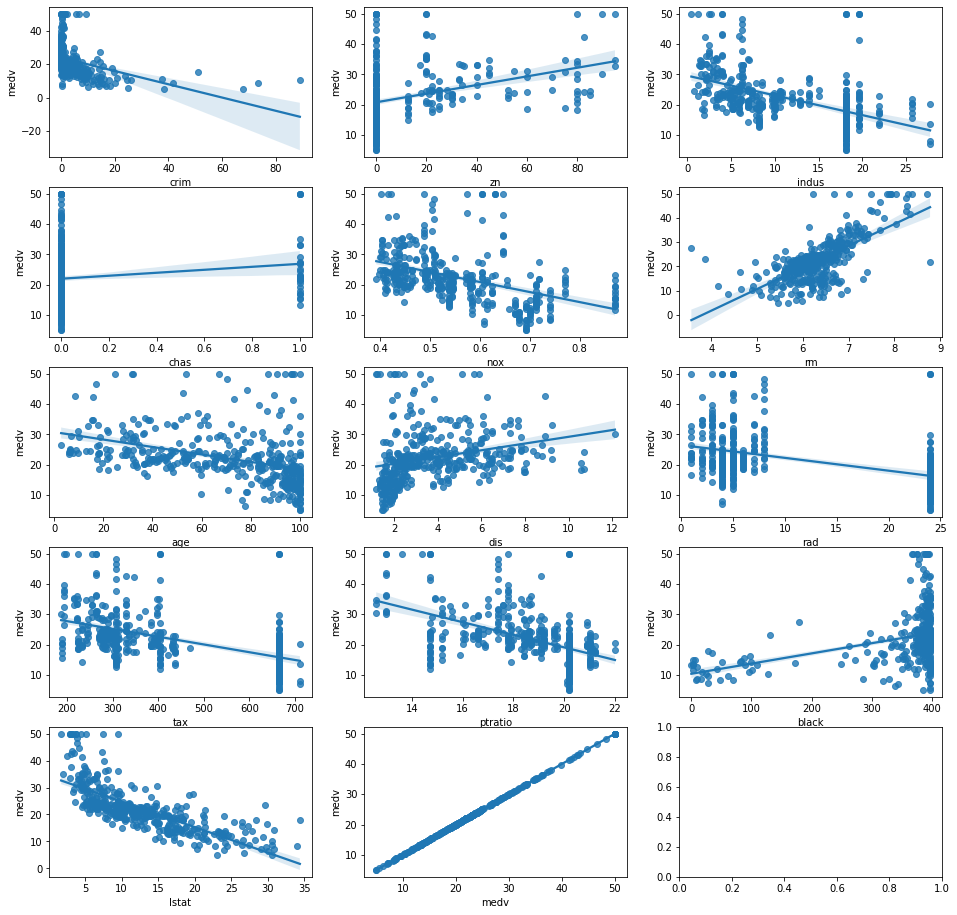

In [74]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = boston_df.columns


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='medv', data=boston_df, ax=axs[row][col])